## Import Initial Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Data Collection

In [2]:
data_file = "https://github.com/arghajit29/DS0522/raw/main/Data%20Science/Projects/winequality-red.csv"

In [3]:
df = pd.read_csv(data_file)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Statistical Analysis

In [4]:
df.shape

(1599, 12)

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df['quality'] = df['quality'].apply(lambda y_value:1 if y_value>=7 else 0)

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


## Visualizing data for skewness

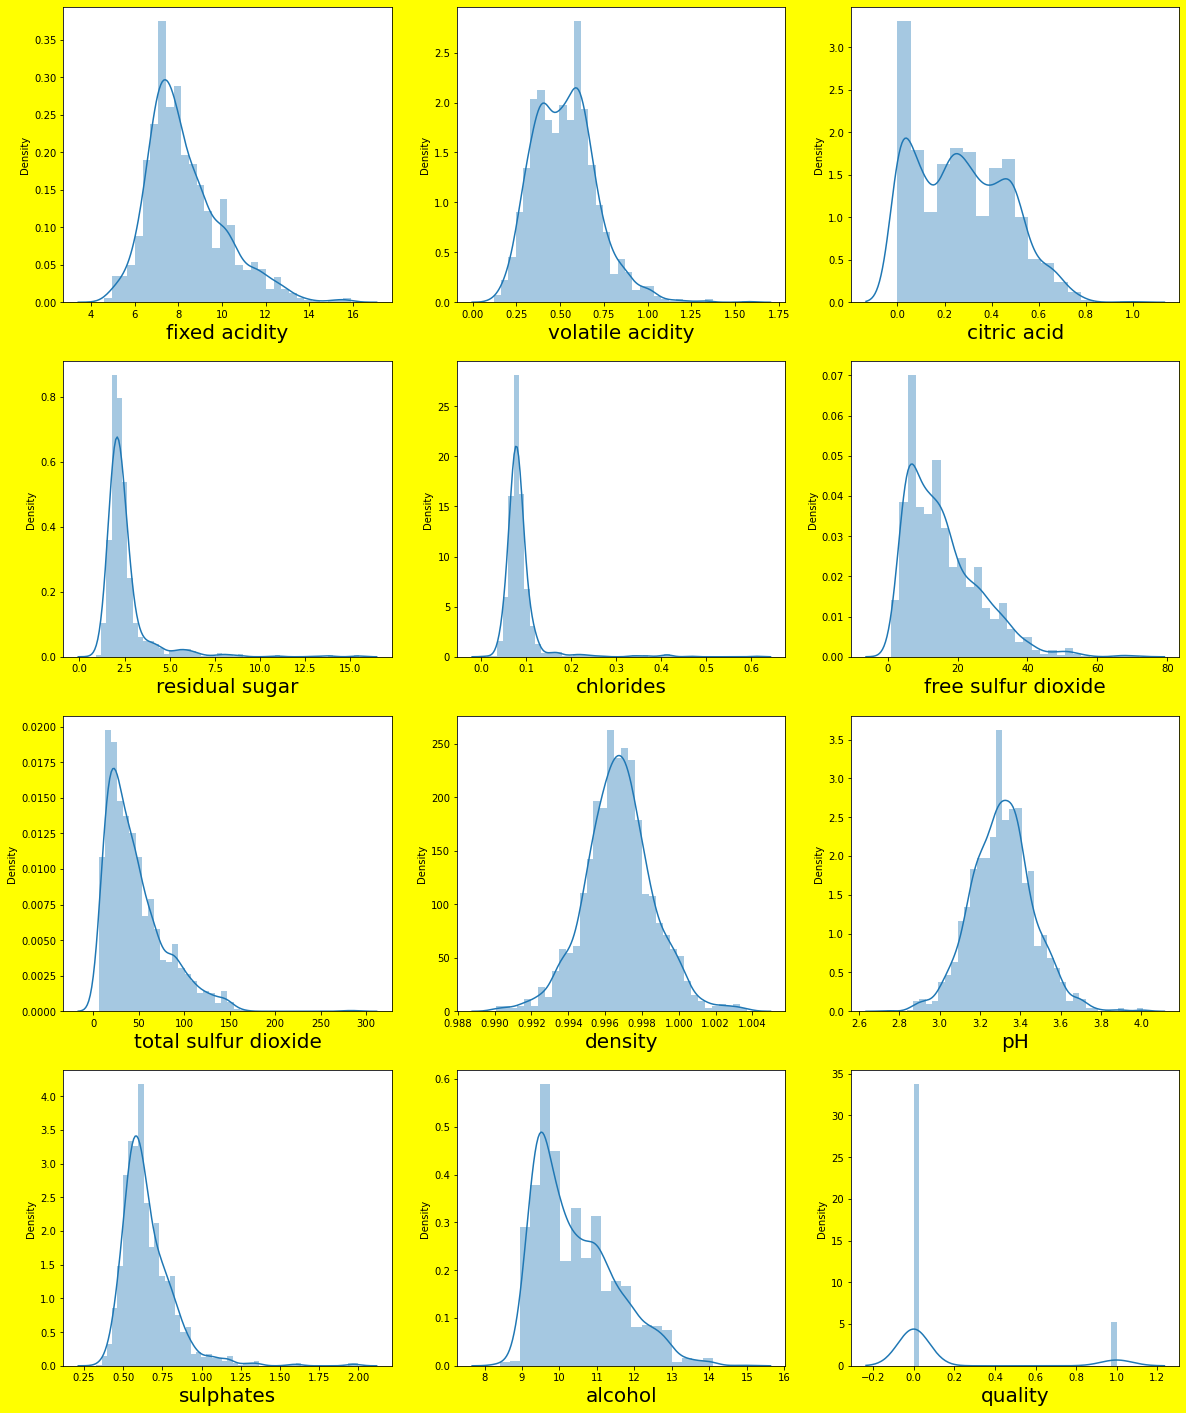

In [7]:
plt.figure(figsize=(20,25), facecolor='yellow')
plotnumber = 1

for column in df:
    if plotnumber <= 12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber += 1
plt.show()

In [8]:
df_features = df.drop('quality', axis=1)

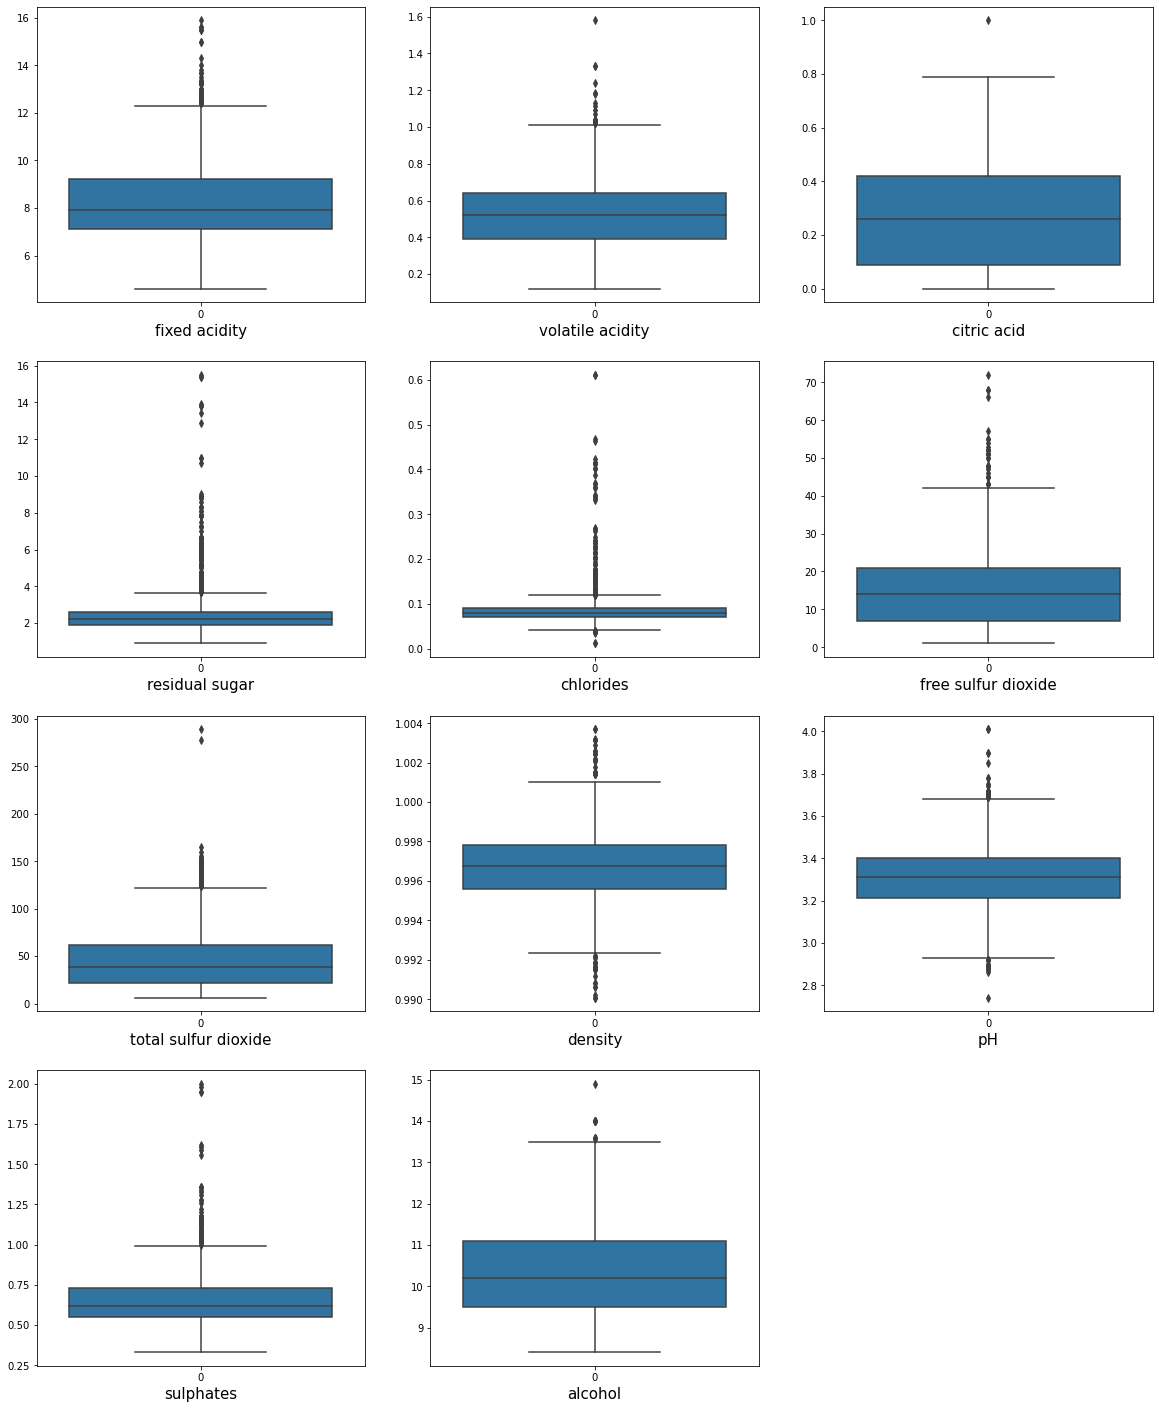

In [9]:
# Visualize the outliers using boxplot

plt.figure(figsize = (20,25))
graph = 1

for column in df_features:
    if graph <= 12:
        plt.subplot(4, 3, graph)
        ax = sns.boxplot(data = df_features[column])
        plt.xlabel(column, fontsize = 15)
    graph += 1
plt.show()

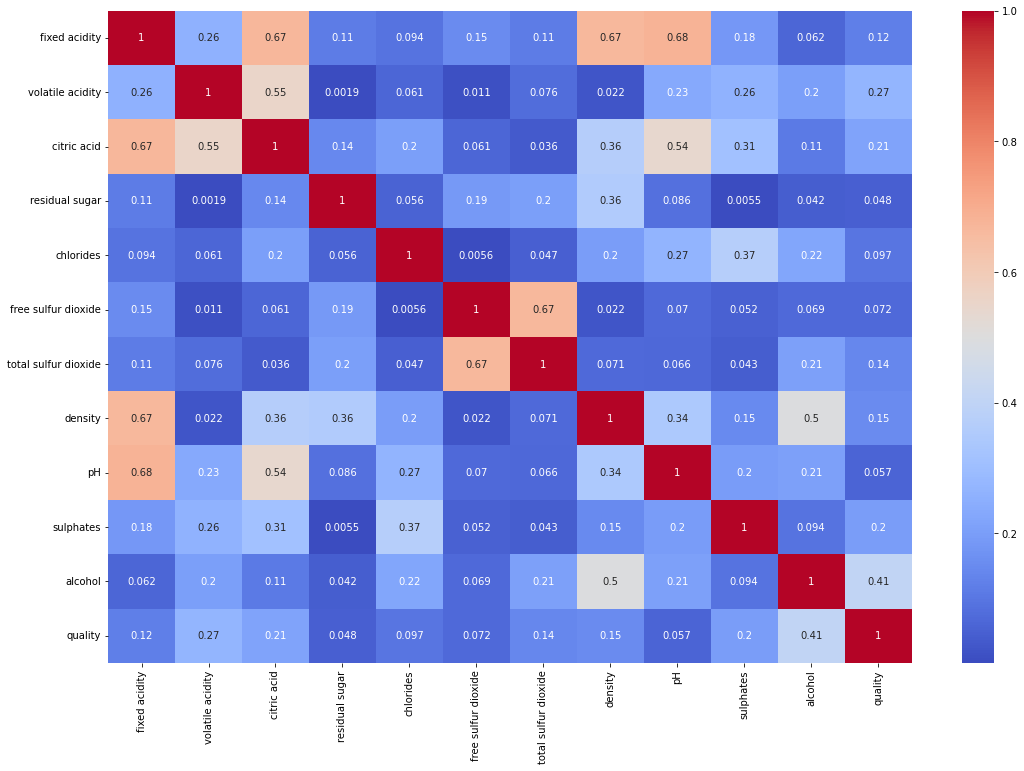

In [10]:
df_corr = df.corr().abs()

plt.figure(figsize = (18,12))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.show()

## Data Preprocessing

In [11]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 2.129363
dtype: float64

Outcome of the skewness. Skewness threshold : +/- 0.65. Columns with skewness

* Fixed acidity
* Volatile Acidity
* Residual Sugar
* Chlorides
* Free Sulfur Dioxide
* Total Sulfur Dioxide
* Sulphates
* Alcohol

In [12]:
df.corr()['quality']

fixed acidity           0.120061
volatile acidity       -0.270712
citric acid             0.214716
residual sugar          0.047779
chlorides              -0.097308
free sulfur dioxide    -0.071747
total sulfur dioxide   -0.139517
density                -0.150460
pH                     -0.057283
sulphates               0.199485
alcohol                 0.407315
quality                 1.000000
Name: quality, dtype: float64

Considering the correlation to be +/- 0.1

Upon checking both skewness and correlation, we are dropping the columns 'residual sugar', 'chlorides' and 'free sulfur dioxide'

In [13]:
new_df = df.drop(['residual sugar','chlorides','free sulfur dioxide'],axis=1)
new_df

,fixed acidity,volatile acidity,citric acid,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,44.0,0.99547,3.57,0.71,10.2,0


In [14]:
from scipy.stats import zscore

z = np.abs(zscore(new_df))
z.shape

(1599, 9)

In [15]:
threshold = 3
print(np.where(z>3))

(array([  13,   15,   17,   38,   43,   45,   81,   86,   88,   91,   92,
         95,  106,  109,  120,  126,  127,  142,  144,  151,  151,  151,
        169,  199,  226,  243,  244,  258,  339,  340,  347,  354,  374,
        381,  391,  442,  442,  467,  480,  515,  544,  554,  554,  555,
        555,  557,  557,  588,  591,  608,  614,  636,  639,  649,  651,
        652,  652,  672,  672,  684,  690,  692,  695,  723,  724,  795,
        821,  836,  837,  889, 1017, 1018, 1051, 1079, 1081, 1111, 1114,
       1244, 1269, 1269, 1270, 1270, 1288, 1289, 1299, 1300, 1312, 1316,
       1319, 1321, 1367, 1370, 1372, 1434, 1435, 1474, 1476, 1493, 1496],
      dtype=int64), array([6, 3, 6, 1, 6, 5, 6, 6, 6, 6, 6, 5, 6, 3, 1, 1, 1, 7, 7, 2, 5, 6,
       6, 1, 6, 0, 0, 6, 6, 6, 0, 3, 0, 0, 0, 0, 4, 7, 4, 3, 0, 0, 4, 0,
       4, 0, 4, 7, 3, 4, 6, 3, 6, 3, 3, 0, 7, 1, 3, 3, 1, 6, 5, 6, 1, 6,
       7, 4, 4, 4, 4, 4, 6, 3, 3, 5, 4, 3, 4, 7, 4, 7, 6, 6, 1, 5, 1, 5,
       6, 5, 6, 6, 6, 4, 4, 4

In [16]:
len(np.where(z>3)[0])

99

In [17]:
df_new = new_df[(z<3).all(axis=1)]
print('Old Dataframe', new_df.shape)
print('New Dataframe', df_new.shape)
print('Total dropped rows :', new_df.shape[0] - df_new.shape[0])

Old Dataframe (1599, 9)
New Dataframe (1510, 9)
Total dropped rows : 89


## Feature and Label assignment

In [18]:
y = df_new['quality']
X = df_new.drop(['quality'], axis=1)

In [19]:
y.value_counts()

0    1305
1     205
Name: quality, dtype: int64

In [20]:
from sklearn.preprocessing import power_transform

X = power_transform(X, method='yeo-johnson')
X

array([[-0.4570752 ,  1.04279539, -1.52528722, ...,  1.36523189,
        -0.58848116, -1.09744421],
       [-0.15909191,  1.90833503, -1.52528722, ..., -0.80905476,
         0.4379732 , -0.50964469],
       [-0.15909191,  1.34420798, -1.24624921, ..., -0.37502775,
         0.21092672, -0.50964469],
       ...,
       [-1.44569039, -0.01241541, -0.66765589, ...,  0.75096923,
         0.90519212,  0.75717321],
       [-1.88369139,  0.75393579, -0.72886041, ...,  1.76745809,
         0.64827431, -0.01570259],
       [-1.76947858, -1.33065261,  1.06382154, ...,  0.54321995,
         0.28856896,  0.75717321]])

In [21]:
pd.DataFrame(X).skew().sort_values()

3   -0.007860
4   -0.000978
5   -0.000019
1    0.004428
2    0.018773
0    0.019927
6    0.024598
7    0.112869
dtype: float64

## Defining a class with model score and CV score to be called

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

def classify(model, X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    test_accuracy = accuracy_score(y_pred, y_test)
    print('Accuracy Score :', test_accuracy * 100, '%')
    
    score = cross_val_score(model, X, y, cv=5)
    print('CV Score :', np.mean(score) * 100, '%')

In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
classify(lr, X, y)

Accuracy Score : 90.21164021164022 %
CV Score : 88.07947019867551 %


In [24]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
classify(kn, X, y)

Accuracy Score : 86.77248677248677 %
CV Score : 85.89403973509934 %


In [25]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
classify(dt, X, y)

Accuracy Score : 87.56613756613757 %
CV Score : 82.51655629139073 %


In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
classify(rf, X, y)

Accuracy Score : 89.68253968253968 %
CV Score : 87.81456953642385 %


In [27]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier()
classify(et, X, y)

Accuracy Score : 91.53439153439153 %
CV Score : 87.6158940397351 %


In [28]:
import lightgbm

lg = lightgbm.LGBMClassifier()
classify(lg, X, y)

Accuracy Score : 89.68253968253968 %
CV Score : 86.82119205298014 %


In [29]:
from sklearn.svm import SVC

sv = SVC()
classify(sv, X, y)

Accuracy Score : 90.47619047619048 %
CV Score : 87.35099337748345 %


# Plotting the ROC AUC Curve for the best model

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=41)

lr = LogisticRegression()
kn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
et = ExtraTreesClassifier()
lg = lightgbm.LGBMClassifier()
sv = SVC()

lr.fit(x_train, y_train)
kn.fit(x_train, y_train)
dt.fit(x_train, y_train)
rf.fit(x_train, y_train)
et.fit(x_train, y_train)
lg.fit(x_train, y_train)
sv.fit(x_train, y_train)

print('All the models have been trained')

All the models have been trained


In [31]:
lr.score(x_test, y_test)
kn.score(x_test, y_test)
dt.score(x_test, y_test)
rf.score(x_test, y_test)
et.score(x_test, y_test)
lg.score(x_test, y_test)
sv.score(x_test, y_test)

print('All Model Score has been captured')

All Model Score has been captured


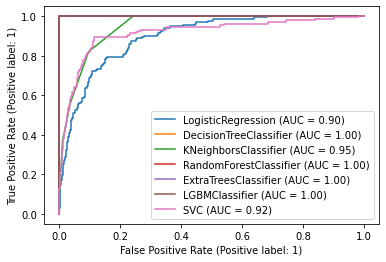

In [32]:
disp = plot_roc_curve(lr, x_train, y_train)

plot_roc_curve(dt, x_train, y_train, ax=disp.ax_)  # ax_ = Axes with confusion matrix

plot_roc_curve(kn, x_train, y_train, ax=disp.ax_)

plot_roc_curve(rf, x_train, y_train, ax=disp.ax_)

plot_roc_curve(et, x_train, y_train, ax=disp.ax_)

plot_roc_curve(lg, x_train, y_train, ax=disp.ax_)

plot_roc_curve(sv, x_train, y_train, ax=disp.ax_)

plt.legend(prop={'size':10}, loc='lower right')

plt.show()

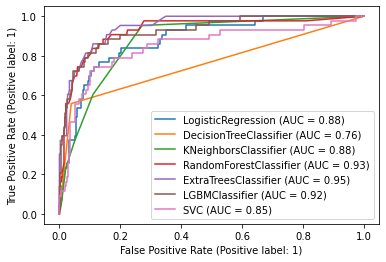

In [33]:
disp = plot_roc_curve(lr, x_test, y_test)

plot_roc_curve(dt, x_test, y_test, ax=disp.ax_)  # ax_ = Axes with confusion matrix

plot_roc_curve(kn, x_test, y_test, ax=disp.ax_)

plot_roc_curve(rf, x_test, y_test, ax=disp.ax_)

plot_roc_curve(et, x_test, y_test, ax=disp.ax_)

plot_roc_curve(lg, x_test, y_test, ax=disp.ax_)

plot_roc_curve(sv, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':10}, loc='lower right')

plt.show()